# Pymaceuticals Inc.
---

### Analysis

- There is a clear and present positive correlation between mouse weight and tumor volume for the Capomulin Regimen. Taking into consideration Mouse I509, for example – over the course of forty days, the tumor mass recued by a ninth of its original weight. The potential here for Ramicane and Capomulin is not insignificant.
 

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [33]:
# Checking the number of mice.
num_mice = mouse_metadata['Mouse ID'].nunique()
print(f"Number of mice: {num_mice}")

Number of mice: 249


In [34]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicated_mice

array(['g989'], dtype=object)

In [35]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

# Get all the rows that correspond to the duplicate mouse ID
duplicate_rows = merged_df.loc[mask]

# Get all the data for the duplicate mouse ID 'g989'
duplicate_mouse_data = duplicate_rows.loc[duplicate_rows['Mouse ID'] == 'g989']

# Display the data for the duplicate mouse ID
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df['Mouse ID'] != 'g989']
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [37]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [38]:
# Group the data by drug regimen
regimen_group = clean_df.groupby(['Drug Regimen'])

# Calculate the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = regimen_group['Tumor Volume (mm3)'].mean()
tumor_median = regimen_group['Tumor Volume (mm3)'].median()
tumor_var = regimen_group['Tumor Volume (mm3)'].var()
tumor_std = regimen_group['Tumor Volume (mm3)'].std()
tumor_sem = regimen_group['Tumor Volume (mm3)'].sem()

# Assemble the summary statistics into a single DataFrame
summary_stats_df = pd.DataFrame({'Mean Tumor Volume': tumor_mean,
                                 'Median Tumor Volume': tumor_median,
                                 'Tumor Volume Variance': tumor_var,
                                 'Tumor Volume Std. Dev.': tumor_std,
                                 'Tumor Volume Std. Err.': tumor_sem})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_stats = merged_df.groupby('Drug Regimen').agg(
    Mean=('Tumor Volume (mm3)', 'mean'),
    Median=('Tumor Volume (mm3)', 'median'),
    Variance=('Tumor Volume (mm3)', 'var'),
    Standard_Deviation=('Tumor Volume (mm3)', 'std'),
    SEM=('Tumor Volume (mm3)', 'sem')
)
# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

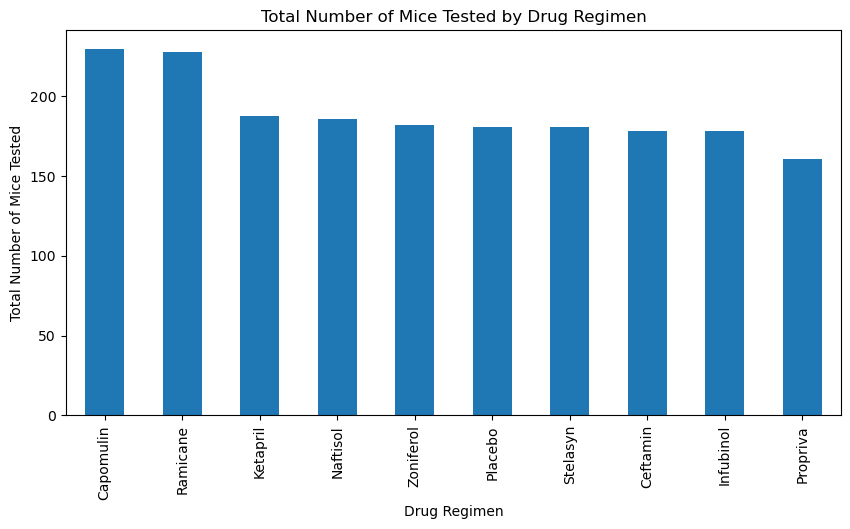

In [40]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Group the data by drug regimen and count the number of timepoints for each regimen
timepoints_by_regimen = merged_df.groupby('Drug Regimen')['Timepoint'].count()

# Create a bar plot
timepoints_by_regimen_sorted = timepoints_by_regimen.sort_values(ascending=False)

timepoints_by_regimen_sorted.plot(kind='bar', figsize=(10,5))

# Set the title and labels
plt.title('Total Number of Mice Tested by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Mice Tested')

# Display the plot
plt.show()

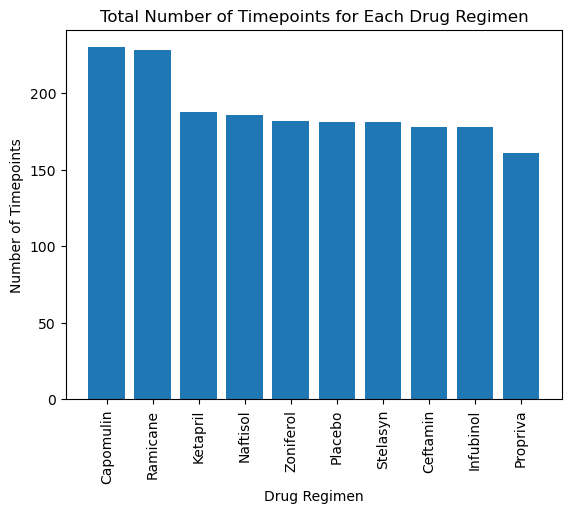

In [41]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Calculate the total number of timepoints for each drug regimen
regimen_timepoints = merged_df.groupby('Drug Regimen')['Timepoint'].count()
regimen_timepoints_sorted = regimen_timepoints.sort_values(ascending=False)

# Create a bar chart
plt.bar(regimen_timepoints_sorted.index, regimen_timepoints_sorted.values)

# Set the title and axis labels
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

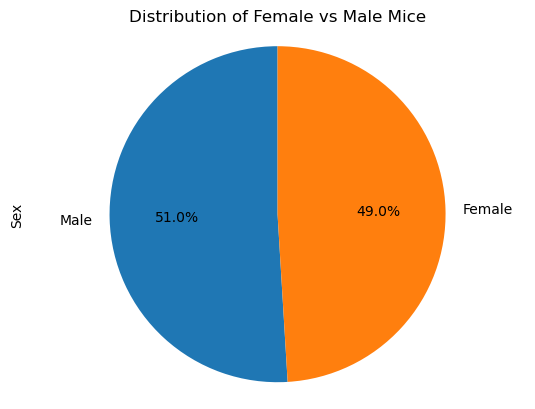

In [42]:
# Count the number of mice in each sex
gender_counts = clean_df['Sex'].value_counts()

# Create a pie chart using pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')
plt.show()

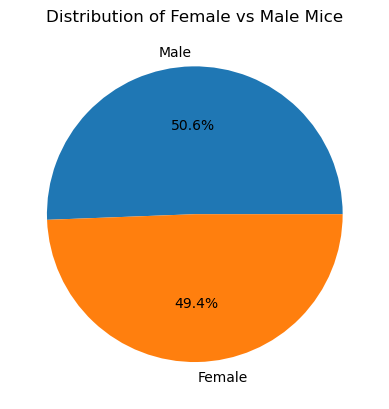

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

import matplotlib.pyplot as plt

# Count the number of mice in each sex
gender_counts = merged_df['Sex'].value_counts()

# Create a pie chart using pyplot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = merged_df[merged_df['Drug Regimen'].isin(regimen_list)]

# Get the last (greatest) timepoint for each mouse
last_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume_df = pd.merge(last_timepoint, filtered_df, on=['Mouse ID', 'Timepoint'], how='left')[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']]

final_volume_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane


In [45]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Print potential outliers
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


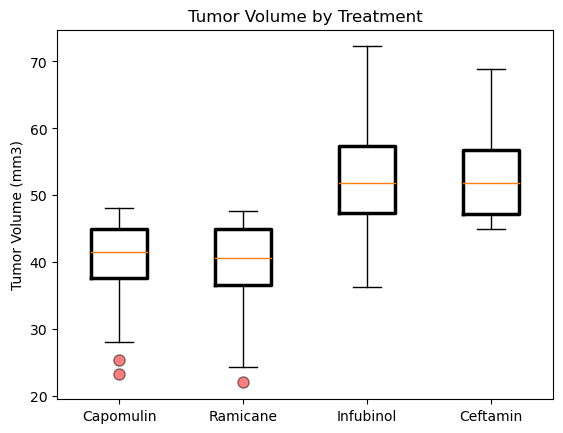

In [46]:
import matplotlib.pyplot as plt

# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in range(len(treatments)):
    quartiles = tumor_vol_data[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol_data[i][(tumor_vol_data[i] < lower_bound) | (tumor_vol_data[i] > upper_bound)]
    
    # Print potential outliers for each treatment
    print(f"{treatments[i]}'s potential outliers: {outliers}")
    
# Generate a box plot of the tumor volume for each treatment group
fig, ax = plt.subplots()
boxprops = dict(linestyle='-', linewidth=2.5, color='black')
flierprops = dict(marker='o', markersize=8, markerfacecolor='red', alpha=0.5)
ax.boxplot(tumor_vol_data, labels=treatments, boxprops=boxprops, flierprops=flierprops)
ax.set_title("Tumor Volume by Treatment")
ax.set_ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

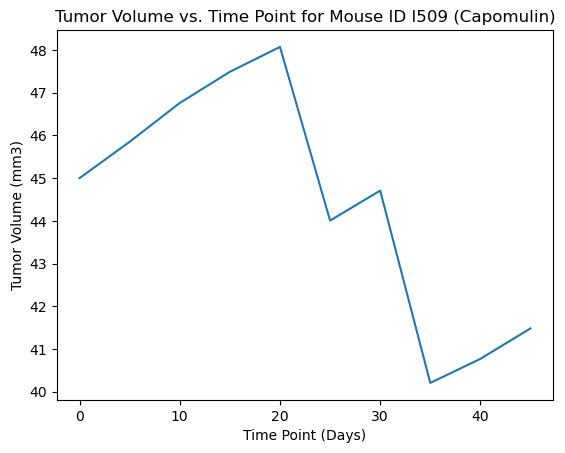

In [47]:
# Select a mouse ID that was treated with Capomulin
mouse_id = "l509"

# Create a subset of the Capomulin treatment data for the selected mouse
capomulin_subset = merged_df.loc[(merged_df["Drug Regimen"] == "Capomulin") & (merged_df["Mouse ID"] == mouse_id), :]

# Generate a line plot of tumor volume vs. time point for the selected mouse
import matplotlib.pyplot as plt

plt.plot(capomulin_subset["Timepoint"], capomulin_subset["Tumor Volume (mm3)"])
plt.title(f"Tumor Volume vs. Time Point for Mouse ID {mouse_id} (Capomulin)")
plt.xlabel("Time Point (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


C:\Users\elijt\AppData\Local\Temp\ipykernel_10308\2884660017.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_avg_data = capomulin_data.groupby(['Mouse ID']).mean()[['Weight (g)', 'Tumor Volume (mm3)']]


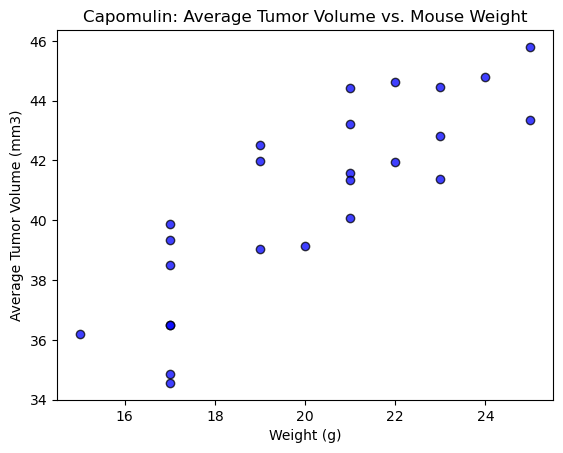

In [48]:
# Filter the data to only include Capomulin regimen
capomulin_data = merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume and mouse weight for each mouse
capomulin_avg_data = capomulin_data.groupby(['Mouse ID']).mean()[['Weight (g)', 'Tumor Volume (mm3)']]

# Create a scatter plot of average tumor volume vs. mouse weight
plt.scatter(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'], marker='o', facecolors='blue', edgecolors='black', alpha=0.75)

# Add labels and title to the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin: Average Tumor Volume vs. Mouse Weight')

# Show the plot
plt.show()

## Correlation and Regression

C:\Users\elijt\AppData\Local\Temp\ipykernel_10308\1005485679.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capomulin_data = capomulin_data.groupby('Mouse ID').mean()[['Weight (g)', 'Tumor Volume (mm3)']]


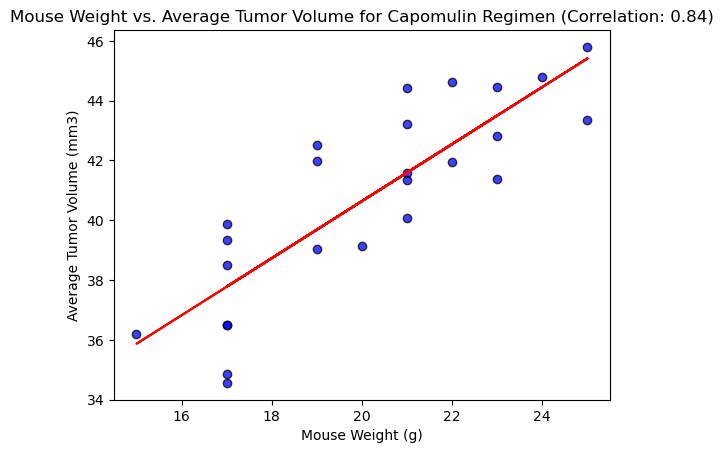

In [49]:
# Filter the data to only include Capomulin regimen
capomulin_data = merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume and mouse weight for each mouse
avg_capomulin_data = capomulin_data.groupby('Mouse ID').mean()[['Weight (g)', 'Tumor Volume (mm3)']]

# Calculate the correlation coefficient between mouse weight and tumor volume
correlation = st.pearsonr(avg_capomulin_data['Weight (g)'], avg_capomulin_data['Tumor Volume (mm3)'])[0]

# Calculate the linear regression model between mouse weight and tumor volume
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_capomulin_data['Weight (g)'], avg_capomulin_data['Tumor Volume (mm3)'])
regress_values = avg_capomulin_data['Weight (g)'] * slope + intercept

# Plot the scatter plot of average tumor volume vs. mouse weight
plt.scatter(avg_capomulin_data['Weight (g)'], avg_capomulin_data['Tumor Volume (mm3)'], marker='o', facecolors='blue', edgecolors='black', alpha=0.75)

# Plot the regression line on the scatter plot
plt.plot(avg_capomulin_data['Weight (g)'], regress_values, 'r-')

# Add labels and title to the plot
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen (Correlation: {:.2f})'.format(correlation))

# Display the plot
plt.show()